In [1]:
import os
import gc

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

print(os.getcwd())

c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\5.잔액정보


In [2]:
temp = pd.read_parquet(f"../../data/train/1.회원정보/201807_train_회원정보.parquet")
segment = temp["Segment"]

del temp
gc.collect()

0

info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

In [3]:
balances = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))
    
    temp = pd.read_parquet(f"../../data/train/5.잔액정보/2018{month:02}_train_잔액정보.parquet")
    temp["Segment"] = segment
    balances.append(temp)

del temp
gc.collect()

0

In [4]:
balances[1].columns

Index(['기준년월', 'ID', '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M',
       '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '월중평잔_일시불_B0M',
       '월중평잔_할부_B0M', '월중평잔_CA_B0M', '카드론잔액_최종경과월', '연체일자_B0M', '연체잔액_B0M',
       '연체잔액_일시불_B0M', '연체잔액_할부_B0M', '연체잔액_현금서비스_B0M', '연체잔액_카드론_B0M',
       '연체잔액_대환론_B0M', '잔액_현금서비스_B1M', '잔액_현금서비스_B2M', '잔액_카드론_B1M',
       '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M', '잔액_할부_B1M',
       '잔액_할부_B2M', '잔액_일시불_B1M', '잔액_일시불_B2M', '연체일수_B1M', '연체일수_B2M',
       '연체원금_B1M', '연체원금_B2M', '연체일수_최근', '연체원금_최근', '최종연체회차', '매각잔액_B1M',
       '최종연체개월수_R15M', 'RV_평균잔액_R12M', 'RV_최대잔액_R12M', 'RV_평균잔액_R6M',
       'RV_최대잔액_R6M', 'RV_평균잔액_R3M', 'RV_최대잔액_R3M', 'RV잔액이월횟수_R6M',
       'RV잔액이월횟수_R3M', '잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M',
       '연체잔액_일시불_해외_B0M', '연체잔액_RV일시불_B0M', '연체잔액_RV일시불_해외_B0M',
       '연체잔액_할부_해외_B0M', '연체잔액_CA_B0M', '연체잔액_CA_해외_B0M', '월중평잔', '월중평잔_일시불',
       '월중평잔_RV일시불', '월중평잔_할부', '월중평잔_CA', '월중평잔_카드론', '평잔_3M', '평잔_

In [ ]:
for idx in range(6):
    print(balances[idx][balances[idx]["Segment"] == "C"]["연체일자_B0M"].value_counts())

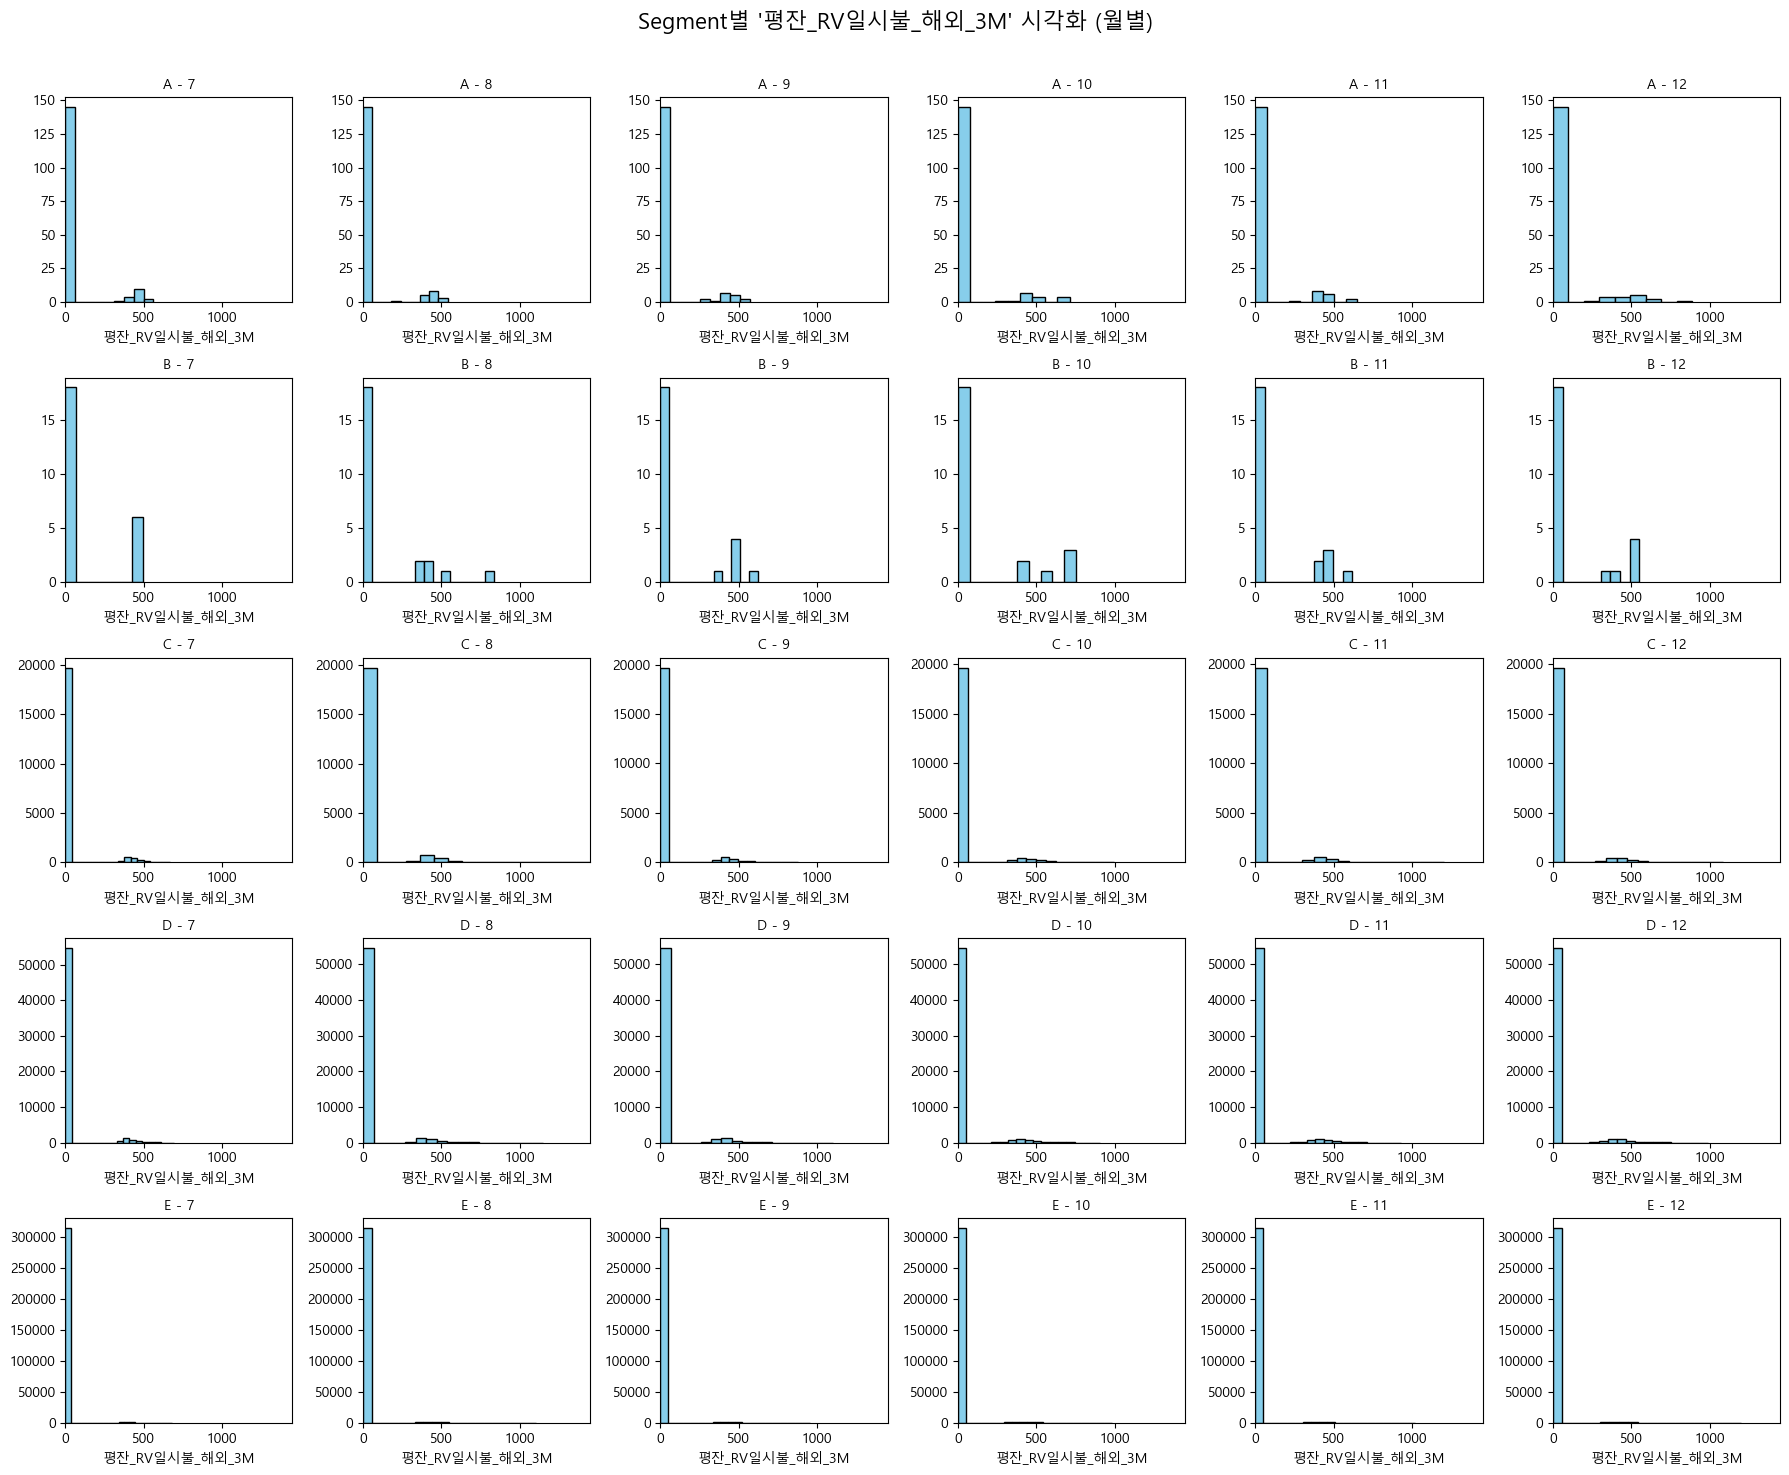

In [5]:
plot_segment_grid(dfs = balances,
                  col = "평잔_RV일시불_해외_3M",
                  is_categorical = False,
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3),
                  numeric_plot_type = "hist")